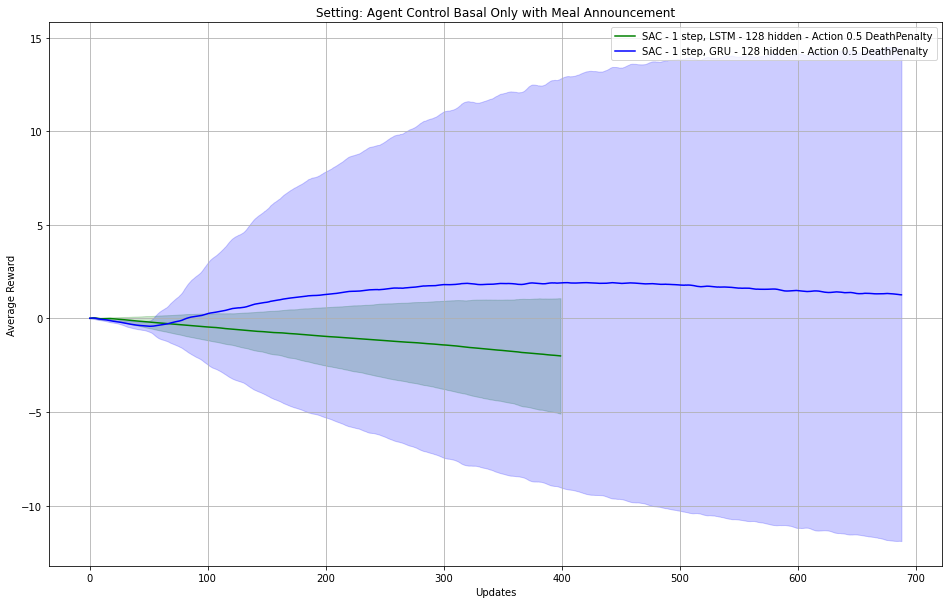

In [24]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import json
%matplotlib inline

USE_A2C = False
USE_SAC = True

PATH = '../results/a2c_5_step_0/args.json'
with open(PATH) as json_file:
    data = json.load(json_file)
seeds = data['seeds']
experiment_path = '/Users/chirathhettiarachchi/RL/phd/sys_control/results/'


def get_avgRewards(path, seeds):
    cur_length = []
    avg_rewards = []
    refined = []
    FILES = [ path + str(seed)+'.csv' for seed in seeds]
    for file in FILES:
        reward_summary = pd.read_csv(file)
        cur_length.append(reward_summary.shape[0])
        avg_rewards.append(reward_summary)
    for x in avg_rewards:
        refined.append(x[0:min(cur_length)])
    data = pd.concat(refined, axis=1)
    data['mean'] = data.mean(axis=1)
    data['std_dev'] = data.std(axis=1)
    return data


fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111)

if USE_A2C:
    print('a2c')

    
if USE_SAC:
    path_sac = '../results/sac_test_2/avg_reward_summary_'
    sac_data = get_avgRewards(path_sac, seeds)
    sac_mstd = sac_data['std_dev']
    sac_ma = sac_data['mean']
    ax.plot(sac_ma, '-g',label="SAC - 1 step, LSTM - 128 hidden - Action 0.5 DeathPenalty")
    ax.fill_between(sac_mstd.index, sac_ma - 2 * sac_mstd, sac_ma + 2 * sac_mstd, color="g", alpha=0.2)
    
    path_sac = '../results/sac_test_1/avg_reward_summary_'
    sac_data = get_avgRewards(path_sac, seeds)
    sac_mstd = sac_data['std_dev']
    sac_ma = sac_data['mean']
    ax.plot(sac_ma, '-b',label="SAC - 1 step, GRU - 128 hidden - Action 0.5 DeathPenalty")
    ax.fill_between(sac_mstd.index, sac_ma - 2 * sac_mstd, sac_ma + 2 * sac_mstd, color="b", alpha=0.2)

ax.grid()
ax.set_title('Setting: Agent Control Basal Only with Meal Announcement')
ax.set_xlabel('Updates')
ax.set_ylabel('Average Reward')
ax.legend(loc="upper right")

#plt.xlim(0, 4000)
plt.show()

In [7]:
from matplotlib import pyplot as plt
import pandas as pd
import json
%matplotlib inline

def get_avgRewards(path, seeds):
    cur_length = []
    avg_rewards = []
    refined = []
    FILES = [ path + str(seed)+'.csv' for seed in seeds]
    for file in FILES:
        reward_summary = pd.read_csv(file)
        cur_length.append(reward_summary.shape[0])
        avg_rewards.append(reward_summary)
    for x in avg_rewards:
        refined.append(x[0:min(cur_length)])
    data = pd.concat(refined, axis=1)
    data['mean'] = data.mean(axis=1)
    data['std_dev'] = data.std(axis=1)
    return data

path_sac = '../results/sac_test_1/training_summary_'
sac_data = get_avgRewards(path_sac, seeds)



   Episode  Average Reward  Duration    % Normo    % Hypo  % Sev_hypo  \
0        1       11.105846       161  92.982456  7.017544    2.631579   

   % Hyper      LBGI      HBGI        RI  ...  test_hyper  test_lgbi  \
0      0.0  3.827068  1.754188  5.581256  ...          []         []   

  test_hgbi test_ri t_rew_mean t_rew_std t_ri_mean t_ri_std      mean  \
0        []      []          0         0         0        0  30.30852   

     std_dev  
0  55.803837  

[1 rows x 142 columns]
